### 목표
- 이미지 데이터를 이해해보자
- 패션 데이터의 클래스의 개수를 확인해보자.
- 최적화함수, 활성화함수 여러개를 적용하며 모델을 학습한 후 그래프로 시각화하여 비교해보자

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# data 변수에 데이터 담기

data = fashion_mnist.load_data()
data

#((X_train,y_train),(X_test,y_test))
X_train = data[0][0] 
y_train = data[0][1] 
X_test = data[1][0] 
y_test = data[1][1] 

print("훈련용 : ", X_train.shape, y_train.shape)
print("테스트용 : ", X_test.shape, y_test.shape)

훈련용 :  (60000, 28, 28) (60000,)
테스트용 :  (10000, 28, 28) (10000,)


In [ ]:
#(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
#print("훈련용 : ", X_train.shape, y_train.shape)
#print("테스트용 : ", X_test.shape, y_test.shape)

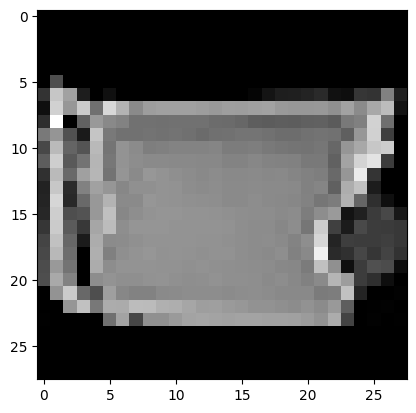

In [ ]:
# 실제 데이터 출력해보기

plt.imshow(X_train[16060],cmap='gray')
plt.show()

In [ ]:
# for i in range(100):
#     plt.imshow(X_train[i],cmap='summer')
#     plt.show()

In [ ]:
# 답데이터 클래스 확인 => 클래스 개수 10개
# 배열이라서 바로 유니크함수에 도달할 수 없으니 넘파이꺼 써줌
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

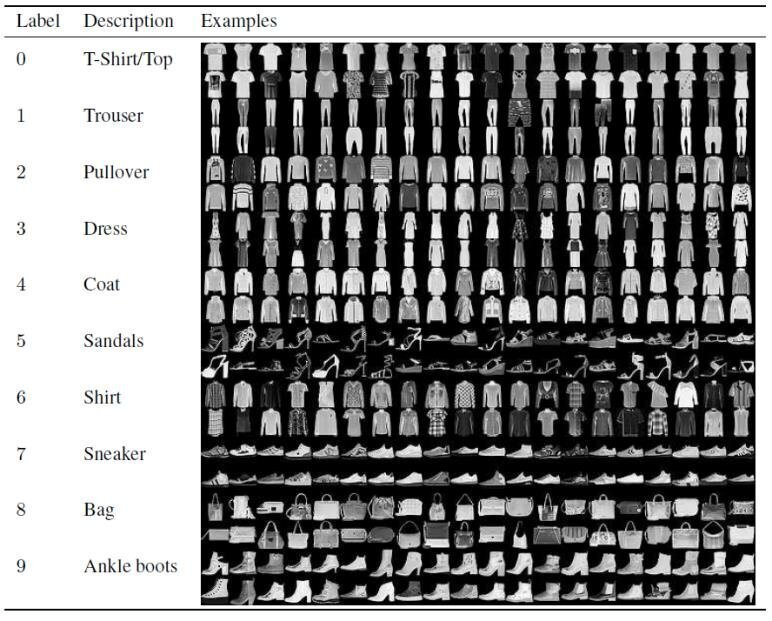


In [ ]:
# 원핫 인코딩
# pd.get_dummies()
# to_categorical

from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

### 활성화 함수, 최적화 함수 별 비교
1. 중간층 활성화함수 : sigmoid, 최적화 함수 : SGD
2. 중간층 활성화함수 : relu, 최적화 함수 : SGD
3. 중간층 활성화함수 : relu, 최적화 함수 : adam
- 각각의 신경망을 설계하고 결과를 비교

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# 중간층 활성화 함수 : sigmoid, 최적화 함수 : SGD

model1 = Sequential()

model1.add(Flatten(input_shape = (28,28))) # 이미지 데이터에서 사용해야한다, 1차원 데이터로 만들어준다.

# Dense를 사용한 3개층(중간층)
model1.add(Dense(units = 200, activation='sigmoid'))
model1.add(Dense(units = 100, activation='sigmoid'))
model1.add(Dense(units = 50, activation='sigmoid'))

# Dense를 사용한 1개층(출력층)
model1.add(Dense(units = 10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='SGD',metrics=['accuracy'])

# validation_split => Train 데이터의 30퍼 정도 검증 데이터에 사용하겠다,
# batch_size : 한번에 사용하는 배치 사이즈
h1 = model1.fit(X_train,y_train_one_hot,validation_split=0.3,epochs=30,
               batch_size=64)

# 검증용 데이터가 분리되어있다면 : validation_data = (검증문제, 검증답)

Epoch 1/30
657/657 [==============================] - 4s 4ms/step - loss: 2.2170 - accuracy: 0.3996 - val_loss: 2.1169 - val_accuracy: 0.5342
Epoch 2/30
657/657 [==============================] - 4s 6ms/step - loss: 1.9809 - accuracy: 0.5364 - val_loss: 1.8185 - val_accuracy: 0.5248
Epoch 3/30
657/657 [==============================] - 3s 4ms/step - loss: 1.6513 - accuracy: 0.5683 - val_loss: 1.4998 - val_accuracy: 0.5868
Epoch 4/30
657/657 [==============================] - 3s 4ms/step - loss: 1.3750 - accuracy: 0.6358 - val_loss: 1.2618 - val_accuracy: 0.6361
Epoch 5/30
657/657 [==============================] - 3s 4ms/step - loss: 1.1685 - accuracy: 0.6787 - val_loss: 1.0834 - val_accuracy: 0.7123
Epoch 6/30
657/657 [==============================] - 3s 4ms/step - loss: 1.0145 - accuracy: 0.7113 - val_loss: 0.9535 - val_accuracy: 0.7245
Epoch 7/30
657/657 [==============================] - 4s 5ms/step - loss: 0.8998 - accuracy: 0.7315 - val_loss: 0.8529 - val_accuracy: 0.7423
Epoch 

In [ ]:
# 중간층 활성화 함수 : relu, 최적화 함수 : SGD
def create_model(activation, optimizer):
    model1 = Sequential()

    model1.add(Flatten(input_shape = (28,28))) # 이미지 데이터에서 사용해야한다, 1차원 데이터로 만들어준다.

    # Dense를 사용한 3개층(중간층)
    model1.add(Dense(units = 200, activation=activation))
    model1.add(Dense(units = 100, activation=activation))
    model1.add(Dense(units = 50, activation=activation))

    # Dense를 사용한 1개층(출력층)
    model1.add(Dense(units = 10, activation='softmax'))

    model1.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

    # validation_split => Train 데이터의 30퍼 정도 검증 데이터에 사용하겠다,
    # batch_size : 한번에 사용하는 배치 사이즈
    h1 = model1.fit(X_train,y_train_one_hot,validation_split=0.3,epochs=30,
                batch_size=64, callbacks = [f_mckp, f_early])
    
    return h1

In [ ]:
# 1. sigmoid + SGD

h1 = create_model('sigmoid', 'SGD')

Epoch 1/30
651/657 [============================>.] - ETA: 0s - loss: 2.2032 - accuracy: 0.4046
Epoch 1: val_accuracy improved from -inf to 0.55678, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/model/fashion_001_0.557.hdf5
657/657 [==============================] - 4s 4ms/step - loss: 2.2022 - accuracy: 0.4054 - val_loss: 2.0800 - val_accuracy: 0.5568
Epoch 2/30
649/657 [============================>.] - ETA: 0s - loss: 1.9167 - accuracy: 0.5390
Epoch 2: val_accuracy improved from 0.55678 to 0.55794, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/model/fashion_002_0.558.hdf5
657/657 [==============================] - 3s 4ms/step - loss: 1.9147 - accuracy: 0.5392 - val_loss: 1.7349 - val_accuracy: 0.5579
Epoch 3/30
648/657 [============================>.] - ETA: 0s - loss: 1.5795 - accuracy: 0.6020
Epoch 3: val_accuracy improved from 0.55794 to 0.64150, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/model/fashion_003_0.641

In [ ]:
h2 = create_model('relu','SGD')

Epoch 1/30
647/657 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0999
Epoch 1: val_accuracy did not improve from 0.82661
657/657 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1008
Epoch 2/30
656/657 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0996
Epoch 2: val_accuracy did not improve from 0.82661
657/657 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 3/30
656/657 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0997
Epoch 3: val_accuracy did not improve from 0.82661
657/657 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 4/30
651/657 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0998
Epoch 4: val_accuracy did not improve from 0.82661
657/657 [==============================] - 3s 5ms

In [ ]:
h3 = create_model('relu','adam')

Epoch 1/30
656/657 [============================>.] - ETA: 0s - loss: 2.2222 - accuracy: 0.7431
Epoch 1: val_accuracy did not improve from 0.82661
657/657 [==============================] - 6s 5ms/step - loss: 2.2216 - accuracy: 0.7431 - val_loss: 0.7973 - val_accuracy: 0.7679
Epoch 2/30
644/657 [============================>.] - ETA: 0s - loss: 0.5907 - accuracy: 0.8134
Epoch 2: val_accuracy did not improve from 0.82661
657/657 [==============================] - 3s 4ms/step - loss: 0.5909 - accuracy: 0.8132 - val_loss: 0.6191 - val_accuracy: 0.8036
Epoch 3/30
653/657 [============================>.] - ETA: 0s - loss: 0.4827 - accuracy: 0.8330
Epoch 3: val_accuracy improved from 0.82661 to 0.83628, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/model/fashion_003_0.836.hdf5
657/657 [==============================] - 3s 4ms/step - loss: 0.4823 - accuracy: 0.8331 - val_loss: 0.4881 - val_accuracy: 0.8363
Epoch 4/30
651/657 [============================>.] - ETA: 0s - 

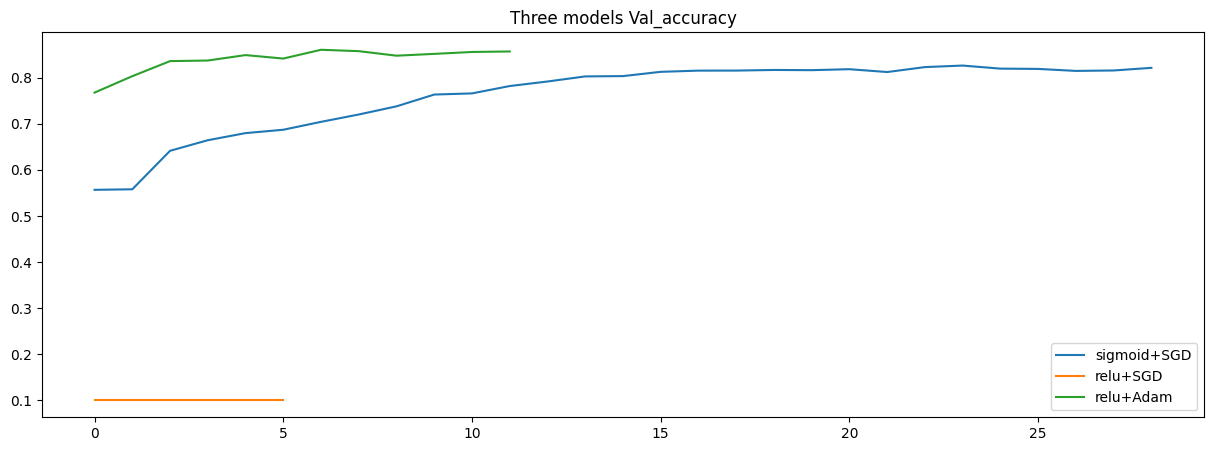

In [ ]:
# 
plt.figure(figsize=(15,5))

# model1
plt.plot(h1.history['val_accuracy'], label='sigmoid+SGD')

# model2
plt.plot(h2.history['val_accuracy'], label='relu+SGD')

# model3
plt.plot(h3.history['val_accuracy'], label='relu+Adam')
plt.title("Three models Val_accuracy")
plt.legend()
plt.show()

In [ ]:
# ModelCheckpoint : 중간 모델 저장
# EarlyStopping : 학습 조기 중단
# 성능이 안좋아질시 학습 중단



In [ ]:
# 모델 저장 경로
model_dir = '/content/drive/MyDrive/colab/DeepLearning/model'

# 파일명
# {epoch:03d} : 정규식 표현법, {변수명 : 출력 형태}
# 03d : 3자리 정수로 표현. 001, 013,
# .3f : 검증 정확도 소수 점 3번째 자리까지 표현

# 파일명 : fashion_013_0.876.hdf5(13번째 epoch에서 0.876으로 저장이 된걸 알수 있다.)
# hdf5 : 딥러닝 모델 확장자
file_path = model_dir + "/fashion_{epoch:03d}_{val_accuracy:.3f}.hdf5"


In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

f_mckp = ModelCheckpoint( # 중간에 있는 좋은 모델 저장
    filepath  = file_path,
    monitor = 'val_accuracy', # 모델 판단의 기준이 되는 값
    save_best_only = True, # Monitor값이 개선되면 저장.
    mode = 'max',
    verbose = 1 # (=True) 모델이 저장될 때 저장되었는지 중간과정 출력


)

In [ ]:
f_early = EarlyStopping(
    monitor = 'val_accuracy',  # 검증용 데이터의 어느정도 성능이 나와야지 계속 출력
    patience = 5 # 값이 개선되지 않아도 기다릴 횟수
)

In [ ]:
h4 = create_model('relu','adam')

Epoch 1/30
657/657 [==============================] - ETA: 0s - loss: 2.4527 - accuracy: 0.7252
Epoch 1: val_accuracy improved from -inf to 0.75489, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/model/fashion_001_0.755.hdf5
657/657 [==============================] - 5s 6ms/step - loss: 2.4527 - accuracy: 0.7252 - val_loss: 0.8021 - val_accuracy: 0.7549
Epoch 2/30
649/657 [============================>.] - ETA: 0s - loss: 0.6298 - accuracy: 0.8022
Epoch 2: val_accuracy improved from 0.75489 to 0.80850, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/model/fashion_002_0.808.hdf5
657/657 [==============================] - 3s 5ms/step - loss: 0.6298 - accuracy: 0.8021 - val_loss: 0.5769 - val_accuracy: 0.8085
Epoch 3/30
648/657 [============================>.] - ETA: 0s - loss: 0.4940 - accuracy: 0.8336
Epoch 3: val_accuracy improved from 0.80850 to 0.81833, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/model/fashion_003_0.818

저장한 모델 끌어와서 쓰기

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_dir + '/fashion_028_0.88.hdf5'

'/content/drive/MyDrive/colab/DeepLearning/model/fashion_028_0.88.hdf5'

In [ ]:
best_model = load_model(model_dir + '/fashion_028_0.88.hdf5')

In [ ]:
best_model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.8745


[0.4171483814716339, 0.8744999766349792]